In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
# upgrade some packages aggressively :-)
import sys
!{sys.executable} -m pip install --user --upgrade intake netcdf4 pydap
!{sys.executable} -m pip install --user --upgrade git+https://github.com/leifdenby/intake-xarray#egg=intake-xarray

In [2]:
from intake import open_catalog

In [3]:
cat = open_catalog("https://raw.githubusercontent.com/d70-t/eurec4a-intake/master/catalog.yml")
ds = cat.specmacs.cloudmask_20200205.to_dask()

In [4]:
import urllib.request
import yaml
flight = yaml.load(urllib.request.urlopen("https://raw.githubusercontent.com/eurec4a/halo-flight-phase-separation/master/flight_phase_files/EUREC4A_HALO_Flight-Segments_20200205_v1.0.yaml"), Loader=yaml.SafeLoader)

In [5]:
seg = [s for s in flight["segments"] if s["segment_id"] == "HALO-0205_sl1"][0]

In [6]:
selection = ds.sel(time=slice(seg["start"], seg["end"]))

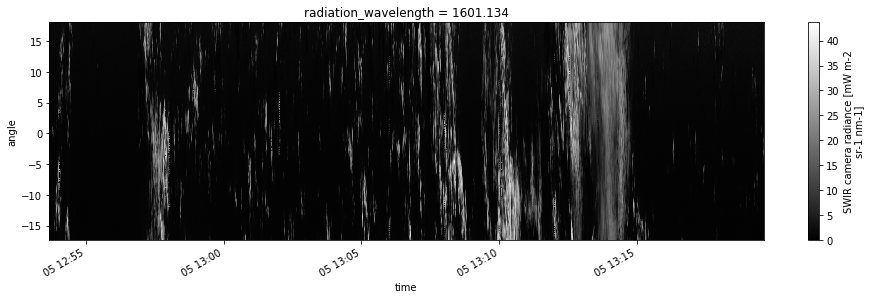

In [7]:
fig, ax = plt.subplots(figsize=(16,4))
selection.swir_radiance.T.plot(cmap="gray")